----

#### Importing data and some basic data cleaning 

Deleting unnecessary columns: Unnamed:0 and Unnamed:0.1. '.count()' to find the columns with missing values. 'list_nacols' is a list containing columns having missing values. 

In [1]:
import pandas as pd
shopdata = pd.read_csv('shop_data.csv')
shopdata

,Unnamed: 0,Unnamed: 0.1,id,chain,dept,category,company,brand,date,productsize,productmeasure,purchasequantity,purchaseamount
0,0,0,86246,205,7,707,1078778070,12564,2012-03-02,12.00,OZ,1,7.59
1,1,1,86246,205,63,6319,107654575,17876,2012-03-02,64.00,OZ,1,1.59
2,2,2,86246,205,97,9753,1022027929,0,2012-03-02,1.00,CT,1,5.99
3,3,3,86246,205,25,2509,107996777,31373,2012-03-02,16.00,OZ,1,1.99
4,4,4,86246,205,55,5555,107684070,32094,2012-03-02,16.00,OZ,2,10.38
5,5,5,86246,205,97,9753,1021015020,0,2012-03-02,1.00,CT,1,7.80
6,6,6,86246,205,99,9909,104538848,15343,2012-03-02,16.00,OZ,1,2.49
7,7,7,86246,205,59,5907,102900020,2012,2012-03-02,16.00,OZ,1,1.39
8,8,8,86246,205,9,921,101128414,9209,2012-03-02,4.00,OZ,2,1.50
9,9,9,86246,205,73,7344,1068142161,20285,2012-03-02,8.00,CT,1,5.79


In [32]:
shopdata1 = shopdata.drop('Unnamed: 0', axis = 1)
shopdata1 = shopdata1.drop('Unnamed: 0.1', axis = 1)
# shopdata1.count()
list_nacols = shopdata1.columns[shopdata1.isna().any()].tolist()
total_missing = shopdata1['productmeasure'].isnull().sum()
total_missing

14933

----

                            Strategy1: Marking 0's with NaN and removing Rows With Missing Values

   In Python, specifically Pandas, NumPy and Scikit-Learn, we mark missing values as NaN.Values with a NaN value are ignored from operations like sum, count, etc.We can mark values as NaN easily with the Pandas DataFrame by using the replace() function on a subset of the columns we are interested in.After we have marked the missing values, we can use the isnull() function to mark all of the NaN values in the dataset as True and get a count of the missing values for each column.

In [6]:
import numpy
shopdata2 = shopdata1.copy()
shopdata2[['dept','brand','productsize']] = shopdata2[['dept','brand','productsize']].replace(0, numpy.NaN)
print(shopdata2.isnull().sum())


id                      0
chain                   0
dept                 2533
category                0
company                 0
brand               21726
date                    0
productsize         14935
productmeasure      14933
purchasequantity        0
purchaseamount          0
dtype: int64


In [29]:
shopdata2.dropna(inplace=True)
print('Percentage of NaN values in the entire dataframe:', ((1150000-1115522)/1150000)*100,'%')

Percentage of NaN values in the entire dataframe: 2.998086956521739 %


                          Strategy2: Keeping 0's as it is and then removing rows with NaN values

In [28]:
shopdata3 = shopdata1.copy()
shopdata3.dropna(inplace=True)
print('Percentage of NaN values in the entire dataframe if keeping 0 values as it is:', ((1150000-1135067)/1150000)*100,'%')

Percentage of NaN values in the entire dataframe if keeping 0 values as it is: 1.298521739130435 %


As we can see, the percentage of Nan values is lesser in case of strategy 2, hence, moving forward with this strategy. 

I can also impute missing values. Imputing refers to using a model to replace missing values.There are many options we could consider when replacing a missing value, for example:

1. A value from another randomly selected record.
2. A mean, median or mode value for the column.
3. A value estimated by another predictive model.
 

----

#### EDA- Questions and Answers

----

**Q1. Create a column in the dataframe that shows how much each customer spends per visit (per day).**

In [11]:
shopdata4 = shopdata3.copy()
shopdata4['sale'] = shopdata4.purchasequantity * shopdata4.purchaseamount 
shopdata4['sale']= shopdata4.groupby(['date', 'id'])['sale'].transform('sum')
shopdata4['transactions'] = 1
shopdata4['transactions'] = shopdata4.groupby(['date', 'id'])['transactions'].transform('cumsum')
shopdata4

,id,chain,dept,category,company,brand,date,productsize,productmeasure,purchasequantity,purchaseamount,sale,transactions
0,86246,205,7,707,1078778070,12564,2012-03-02,12.00,OZ,1,7.59,268.90,1
1,86246,205,63,6319,107654575,17876,2012-03-02,64.00,OZ,1,1.59,268.90,2
2,86246,205,97,9753,1022027929,0,2012-03-02,1.00,CT,1,5.99,268.90,3
3,86246,205,25,2509,107996777,31373,2012-03-02,16.00,OZ,1,1.99,268.90,4
4,86246,205,55,5555,107684070,32094,2012-03-02,16.00,OZ,2,10.38,268.90,5
5,86246,205,97,9753,1021015020,0,2012-03-02,1.00,CT,1,7.80,268.90,6
6,86246,205,99,9909,104538848,15343,2012-03-02,16.00,OZ,1,2.49,268.90,7
7,86246,205,59,5907,102900020,2012,2012-03-02,16.00,OZ,1,1.39,268.90,8
8,86246,205,9,921,101128414,9209,2012-03-02,4.00,OZ,2,1.50,268.90,9
9,86246,205,73,7344,1068142161,20285,2012-03-02,8.00,CT,1,5.79,268.90,10


**Transactions** column in shopdata4 represents the number of previous transactions for that customer per day.

---------------------------------------------------------------------------------------------------------------------

**Q2. Create a column that shows the number of previous visits per customer**

In [12]:
shopdata5 = shopdata4.copy()
shopdata5['visit']=shopdata5.groupby('id')['date'].transform(lambda x: pd.factorize(x)[0])
df = shopdata5.drop_duplicates('date')
df

,id,chain,dept,category,company,brand,date,productsize,productmeasure,purchasequantity,purchaseamount,sale,transactions,visit
0,86246,205,7,707,1078778070,12564,2012-03-02,12.00,OZ,1,7.59,268.90,1,0
52,86246,205,8,809,101300010,8164,2012-03-03,12.00,OZ,1,1.29,57.13,1,1
59,86246,205,36,3601,104900040,3809,2012-03-04,20.00,OZ,1,1.69,37.34,1,2
71,86246,205,64,6408,108289686,6276,2012-03-05,0.75,LT,1,8.29,90.67,1,3
77,86246,205,70,7002,1030813737,25162,2012-03-06,30.00,CT,1,2.39,412.46,1,4
121,86246,205,63,6328,107590070,2073,2012-03-07,20.00,OZ,1,4.95,46.46,1,5
139,86246,205,58,5812,1063690666,12339,2012-03-08,14.00,OZ,1,5.49,5.49,1,6
140,86246,205,27,2710,103320030,875,2012-03-09,14.00,LB,1,6.99,53.53,1,7
153,86246,205,10,1010,105150050,16728,2012-03-10,5.00,OZ,2,5.18,197.77,1,8
175,86246,205,32,3204,101116616,15266,2012-03-11,17.00,OZ,1,5.39,103.39,1,9


Here, **visit** column represents the number of previous visits per customer.

---------------------------------------------------------------------------------------------------------------------

**Q3. Create a column that shows the number of previous visits per customer in SQL** 

---------------------------------------------------------------------------------------------------------------------

**Q4. Create a column that shows the cumulative count (rolling sum) of previous purchases (per customer) that took place in department 99.** 

In [13]:
shopdata6 = shopdata5.copy()
import numpy as np 
shopdata6['transaction_99'] = np.where(shopdata6['dept']==99, 1, 0)
shopdata6['transaction_99'] = shopdata6.groupby(['id'])['transaction_99'].transform('cumsum')
z = (shopdata6['id']==86246) & (shopdata6['dept']==99)
shopdata6[z] 

,id,chain,dept,category,company,brand,date,productsize,productmeasure,purchasequantity,purchaseamount,sale,transactions,visit,transaction_99
6,86246,205,99,9909,104538848,15343,2012-03-02,16.0,OZ,1,2.49,268.90,7,0,1
228,86246,205,99,9908,103338333,33170,2012-03-16,8.0,OZ,1,2.19,23.34,2,14,2
234,86246,205,99,9908,103338333,33170,2012-03-17,16.0,OZ,1,1.49,130.98,2,15,3
238,86246,205,99,9909,107127979,6732,2012-03-17,7.0,OZ,2,8.38,130.98,6,15,4
252,86246,205,99,9908,103338333,33170,2012-03-18,160.0,OZ,1,5.99,117.54,1,16,5
256,86246,205,99,9909,107143070,5072,2012-03-18,22.0,OZ,1,2.59,117.54,5,16,6
300,86246,205,99,9908,103338333,33170,2012-03-21,16.0,OZ,2,3.98,253.87,2,19,7
304,86246,205,99,9909,107143070,5072,2012-03-21,22.0,OZ,1,2.59,253.87,6,19,8
308,86246,205,99,9909,107127979,6732,2012-03-21,10.0,OZ,1,3.69,253.87,10,19,9
351,86246,205,99,9904,103338333,33170,2012-03-22,48.0,OZ,1,3.59,37.55,1,20,10


**transaction_99** represents the cumulative count (rolling sum) of previous purchases (per customer) that took place in department 99.

---------------------------------------------------------------------------------------------------------------------

**Q5 Create a histogram that shows the distinct visits per customer. A distinct visit is defined as a customer visiting the store on two separate days.**

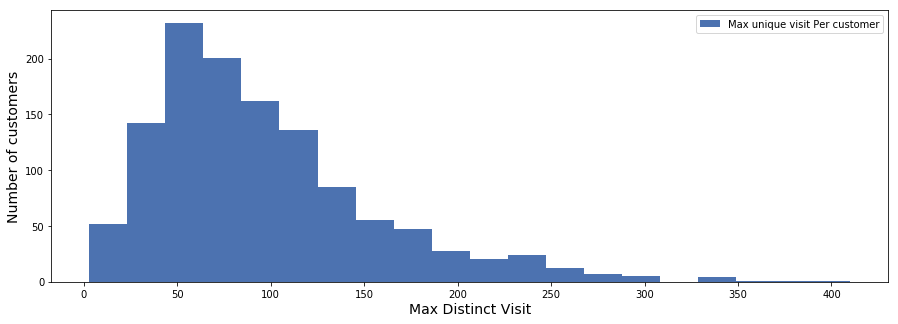

In [15]:
import numpy as np
import matplotlib.pyplot as plt

bins = len(shopdata5['visit'].unique()) 
uniq_id = shopdata5['id'].unique()
hist = []

for i, id_ in enumerate(uniq_id):
    z = (shopdata5['id']==id_) 
    x =  np.array(shopdata6[z]['visit'].max()) 
    hist +=[x]

plt.style.use('seaborn-deep')
fig, ax =plt.subplots(figsize=(15, 5))

plt.hist([hist], 20, label=['Max unique visit Per customer'])
plt.ylabel('Number of customers', fontsize=14)
plt.xlabel('Max Distinct Visit', fontsize=14)
plt.legend(loc='upper right')

plt.show()            

---------------------------------------------------------------------------------------------------------------------

**Q6 Plot the distribution of days between visits, per customer. For example, if a customer comes in on 1/1/2019 and again on 1/3/2019, the days between visits equals 2 days.**

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

shopdata3['date'] = pd.to_datetime(shopdata3['date'])
shopdata3['difference']=shopdata3.groupby(['id'])['date'].transform(lambda x : x.diff())
shopdata3['difference'] = shopdata3['difference'].dt.days
df = shopdata3[shopdata3['difference'] != 0]
unique = df['id'].unique()


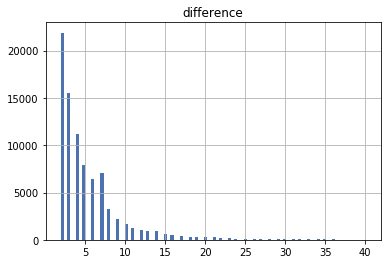

In [17]:
histogram = df.hist(column = 'difference',bins = 100,range=[2,40])

In [ ]:
#This code snippet produces all the graphs per unique customer...In total there are almost 1215 graphs.
#Thus takes a lot of time. 
for i in unique:
    df1 = df[df['id'] == i]
    plt.plot(df1['date'], df1['difference'])
    plt.show()

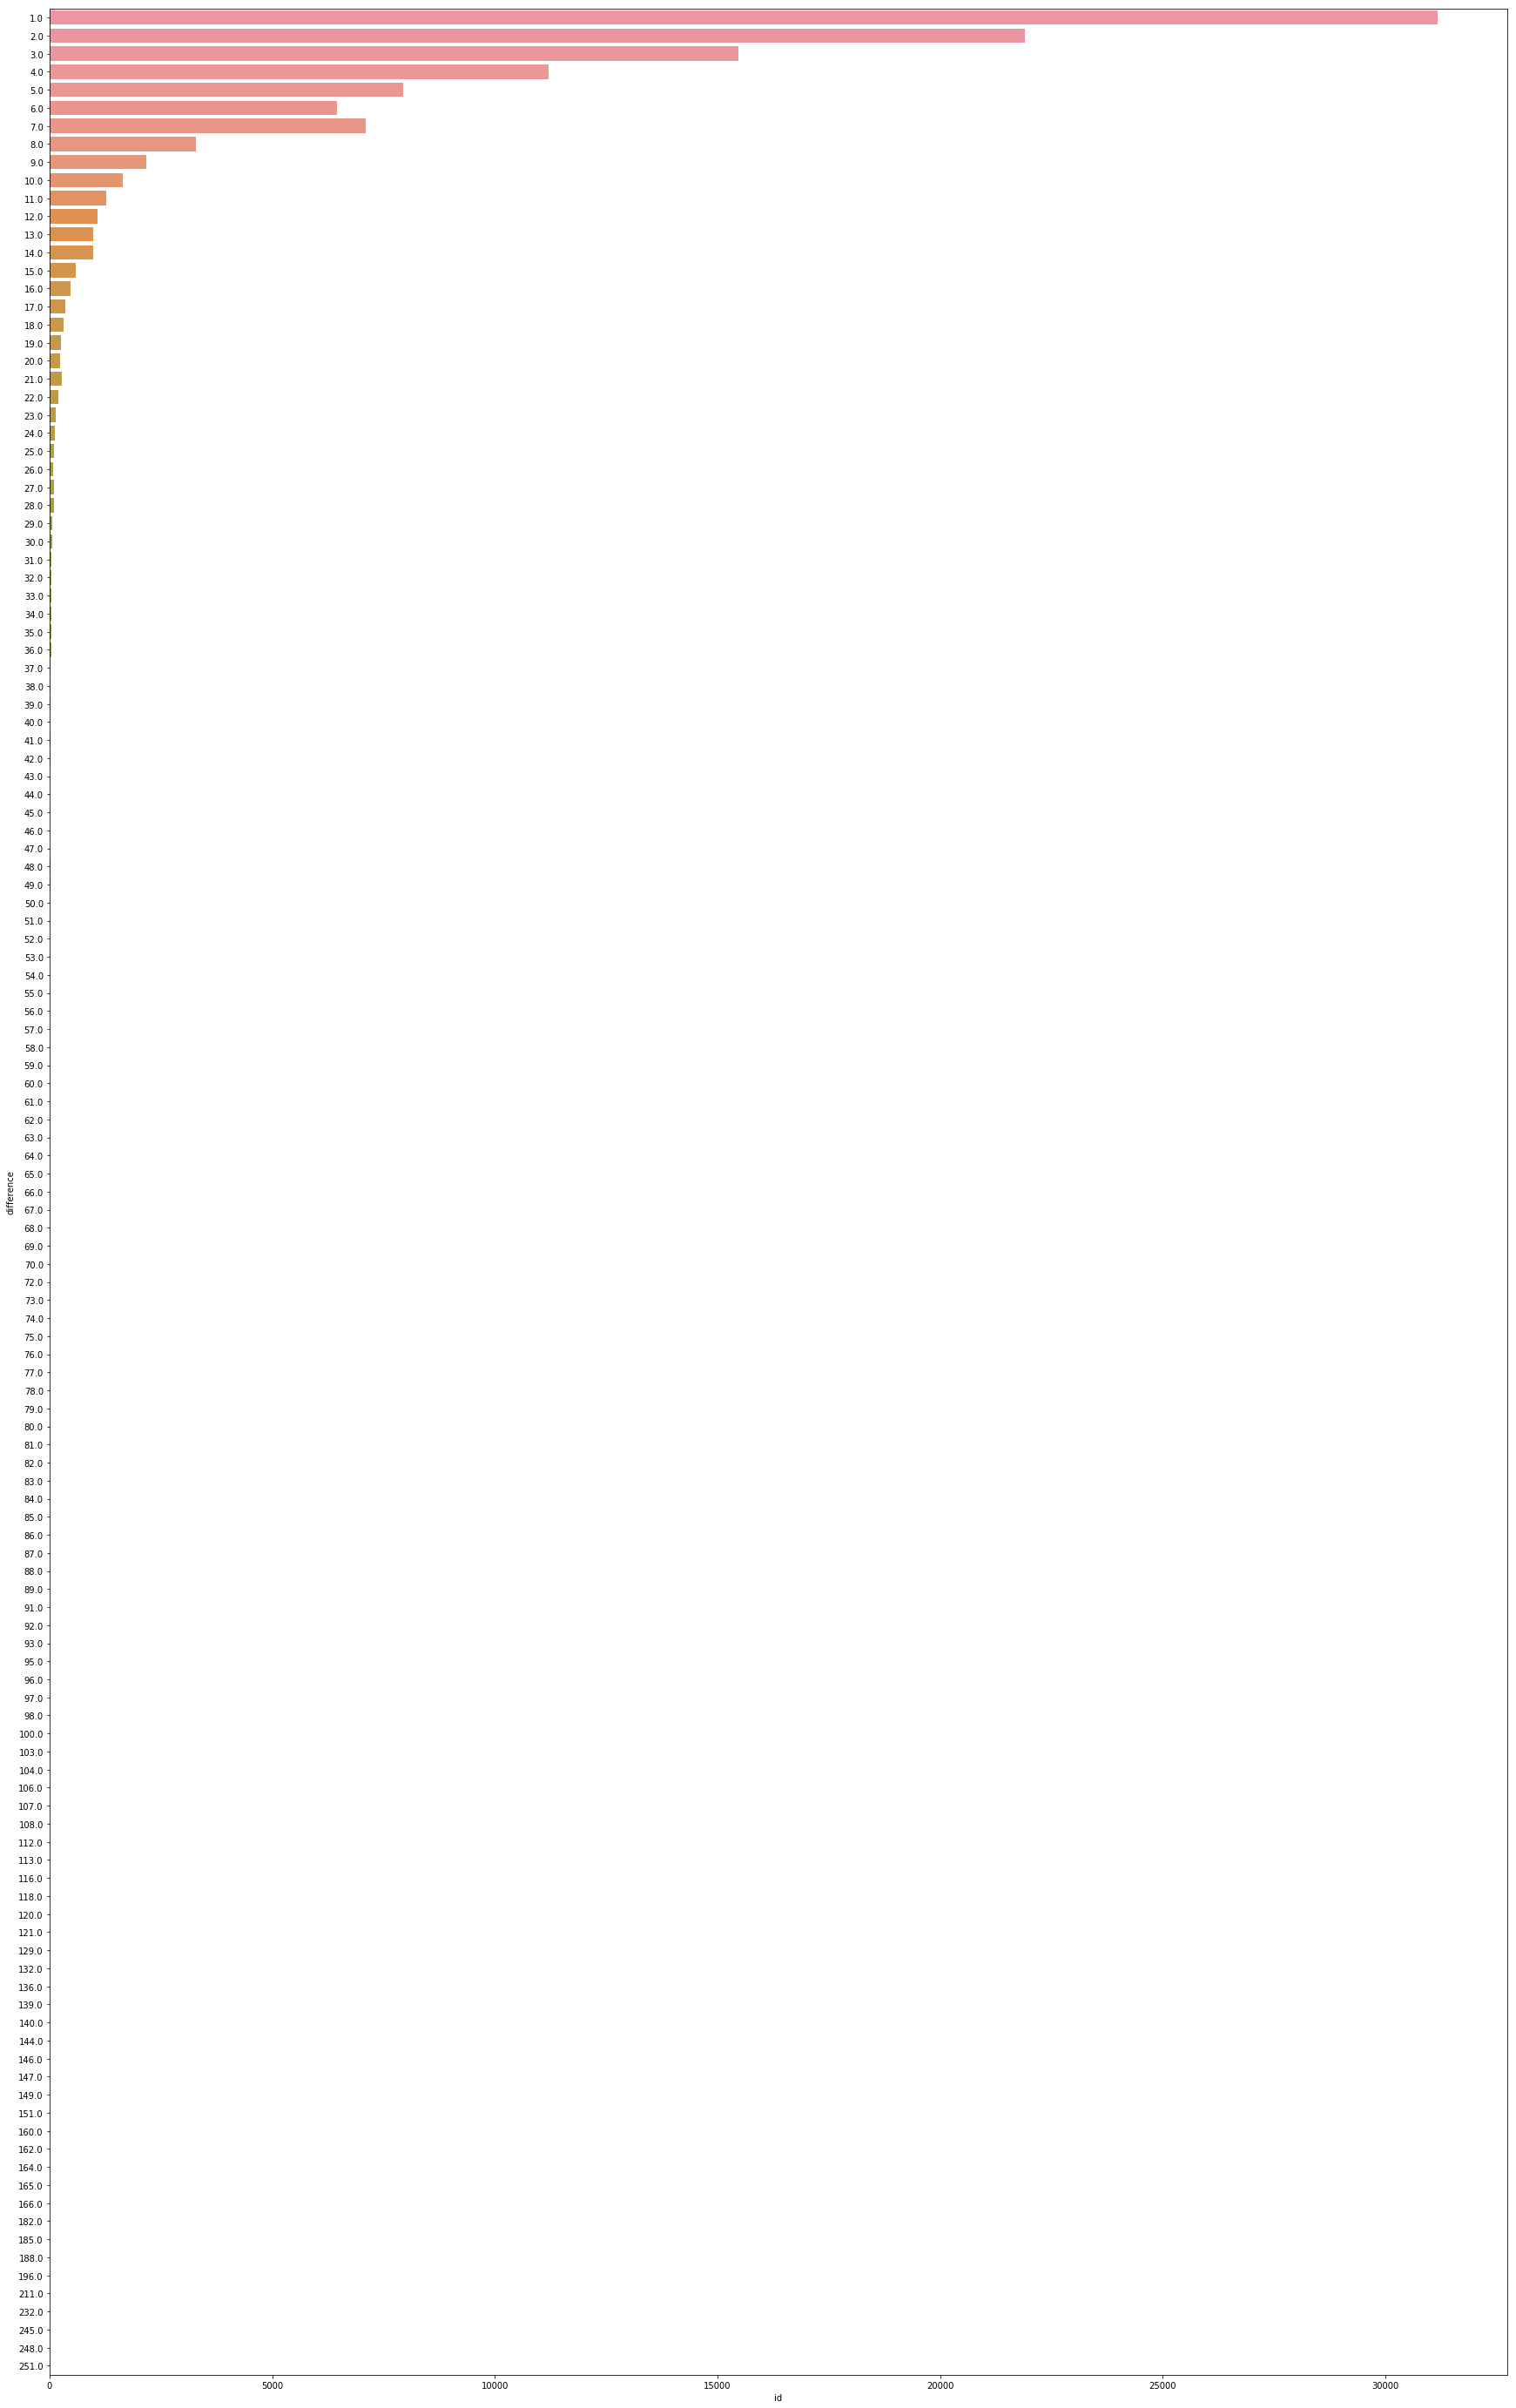

In [18]:
count = df.groupby('difference').count().reset_index()
f, ax = plt.subplots(figsize=(30,50))
sns.barplot( x="id",y="difference", data=count,orient = 'h')

**Q7 Write a function that “looks into the future” and creates a Boolean column in your dataframe. The column will have a value of 1 if the customer comes in to the store (and completes a purchase) within the next five days, 0 otherwise.**



In [19]:
shopdataXX1 = shopdata5.copy()


shopdataXX1['date']=pd.to_datetime(shopdataXX1['date'])
shopdataXX1['month'] = pd.DatetimeIndex(shopdataXX1['date']).month
shopdataXX1['difference']=shopdataXX1.groupby(['id'])['date'].transform(lambda x : x.diff())
shopdataXX1['difference'] = shopdataXX1['difference'].dt.days
shopdataXX1['future'] = np.where(shopdataXX1['difference'] > 5, 0, 1)
shopdataXX1 = shopdataXX1.fillna(0)

In [ ]:
from sklearn.utils import shuffle
from numpy import mean
from numpy import std
from pandas import read_csv
from matplotlib import pyplot
from sklearn.linear_model import LogisticRegression


df_1 = shopdataXX1.copy()
X= df_1[['id','chain','dept','category','company','brand','productsize','purchasequantity','purchaseamount','sale','transactions','visit','month','difference']]  
y= df_1['future']  
train_x,train_y = X.iloc[:380000, :-1], X.iloc[:380000, -1].astype('int')
test_x,test_y = df_1.iloc[380001:, :-1], df_1.iloc[380001:, -1].astype('int')
classifier_LR = LogisticRegression(random_state=100,class_weight = 'balanced')
classifier_LR.fit(train_x,train_y)
y_pred1 = classifier_LR.predict(test_x)
print('Accuracy : {:.4f}'.format(classifier_LR.score(df_1.iloc[380001:, :-1], df_1.iloc[380001:, -1].astype('int'))))






**Note:** Due to time and computational resource constraints, the above cell did not produce any output. At the time of submission, it was running for 4 hours.

----------------------------------------------------------------------------------------------------------------------

**Q8: Plot the distribution of how much customers spend per day.**

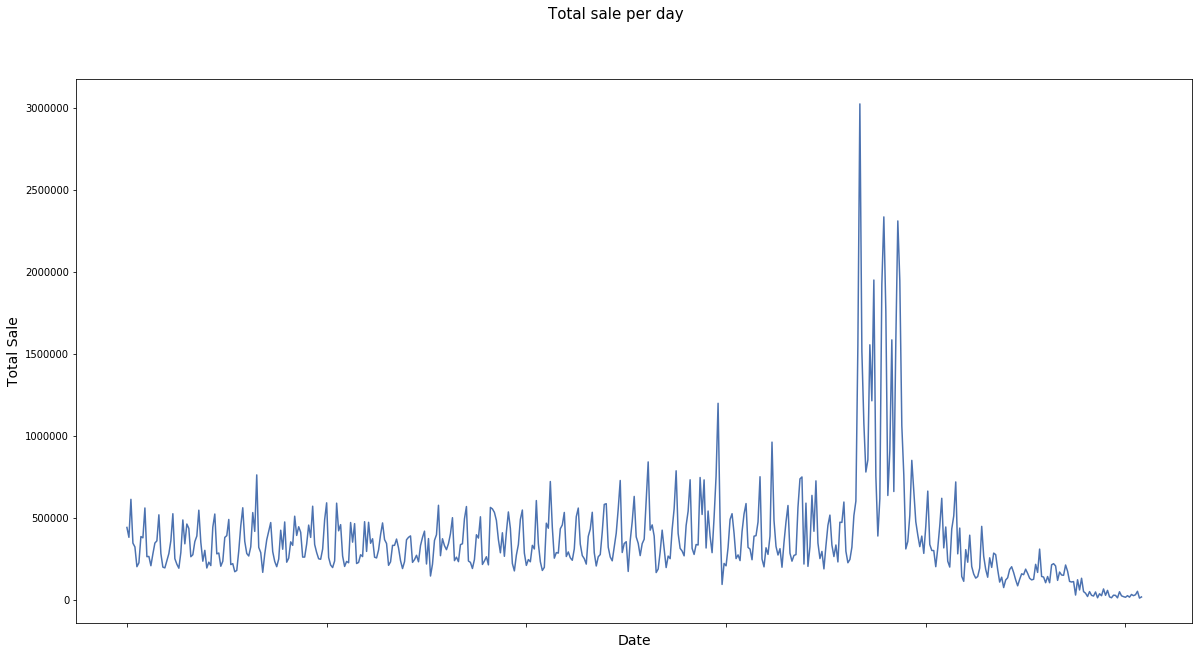

In [22]:
import matplotlib.pyplot as plt
shopdata7 = shopdata5.copy()

fig, ax = plt.subplots(figsize=(20,10))
shopdata7.groupby(['date']).sum()['sale'].plot(ax=ax)
fig.suptitle('Total sale per day', fontsize=15)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Sale', fontsize=14)
plt.show()

---

**Q9: Which customer(s) has the highest number of consecutive shopping days?**

In [23]:
# Create a Series which checks for the difference between Dates within each ID. 
# Check if that's not 1 day, and then groupby the ID and the cumulative sum of that Series

shopdata9 = shopdata5.copy()
shopdata9['date'] = pd.to_datetime(shopdata9['date'])
s = shopdata9.groupby('id').date.diff().dt.days.fillna(1).ne(1).cumsum()
n = shopdata9.groupby(['id', s], as_index=False).size().reset_index(level=1, drop=True)
print("Customer id %s has maximum consecutive days = %s"%(n.idxmax(), n.max()))

Customer id 50545000 has maximum consecutive days = 7


---

**Q10: On average how often do customers come in per month?**

Text(0.5,0.98,'Average visit per month')

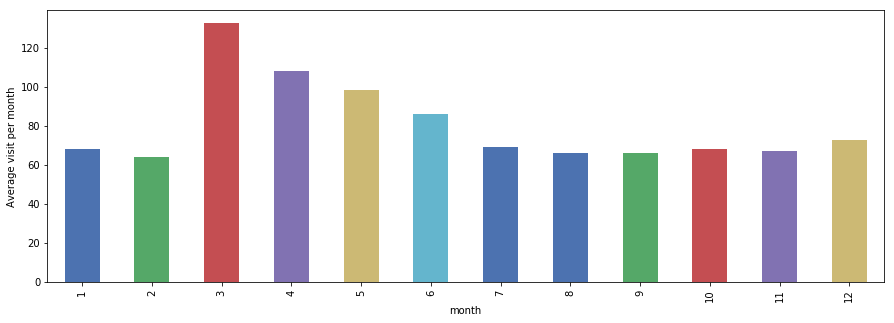

In [24]:
shopdata10 = shopdata5.copy()

shopdata10['date']=pd.to_datetime(shopdata10['date'])
shopdata10['month'] = pd.DatetimeIndex(shopdata10['date']).month
grp_df= shopdata10.groupby(['month','id'])['id'].count().groupby('month').mean()
ax = grp_df.plot(kind="bar", figsize=(15,5))
ax.set_ylabel('Average visit per month')
fig.suptitle('Average visit per month', fontsize=20)


---

**Q11: Plot the average dollar amount spend per month?**


Text(0.5,0.98,'Average dollar amount per month')

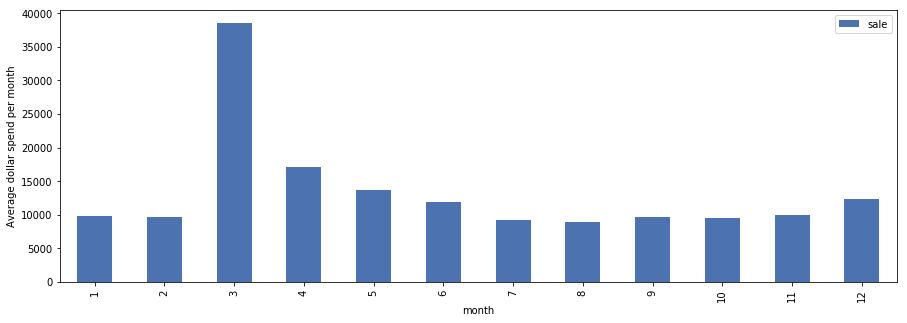

In [26]:
grp_df1= pd.DataFrame(shopdata10.groupby(['month','id'])['sale'].sum()).groupby('month').mean()
ax = grp_df1.plot(kind="bar", figsize=(15,5))
ax.set_ylabel('Average dollar spend per month')
fig.suptitle('Average dollar amount per month', fontsize=10)


---

**Q12: By this point you've done enough EDA to have a decent understanding of the data you are working with. Without writing any code, please explain below how you would build a useful model around this data.**

**A: What other data do you wish you could have had access to?**


Ans: I wish I had access to following features:

1. Generally, stores have campaigns like- 20% off, buy 1 get 1 free etc, for reasons such as able to attract more customers, sell some particular product to finish its inventory before expiry etc. From the data, though we are able to figure out which particular brand or product is selling more but we don't have enough information to infer the reason behind a product's/brand's popularity. It's not enough to know that a particular product is being sold more, we also gotta know the reason behind its popularity. I wish I could have had access to all the active campaigns and offers in the given time period. 

2. Having a better customer demographic would have been useful too. 

3. Store inventory information - for making inferences about the supply-demand relationship per product/brand.



**B: In your opinion, what would the company holding this data care about?**




Ans: In my opinion, the company holding this data care about bringing some new and improved changes in their sales strategy by making inferences based on their past sales records in order to be able to make more profit, increase the number of target customers, attract customers from different demographics etc. 

**C: What machine learning algorithm would you implement and why?**

a. Based on the purchaseamount and purchasequantity, we can  classify the customer database into four distinct quadrants: customers who buy cheap and essential products/ customers who buy costly and essential products/ customers who buy cheap and non-essential but desirable products/ customers who buy costly and non-essential but desirable products.By doing so, the company can easily come up with appropriate deals per class in order to increase sales from all the dimensions. Thus, leading to an overall increase in the profit. 


I can either do :

1. Binary classification independently for cost and desirability. For that, I can use Logistic/Polynomial regression. If the data is small lets say represents a shorter time period, I can also use Decision Tree Classifier for better accuracy but if the data is large, a decision tree might not perform well and in that case, I can use Random Forest Classifier.I can also easily find the most relevant features from the feature set and improve the classifier's accuracy. 

2. Alternatively, since the problem statement can also be identified as a multi-label classification problem,hence in which case, I can use one of the three multi-label classification algorithms- Binary Relevance, Classifier Chains or Label Powerset. Or, can use the multi-label classification version of Random Forest as provided by Scikit-Learn.  

Due to time constraints, I could not implement the algorithms myself and compare the performances. One can also use techniques like Cloud AutoML.



#### How Auto ML Works
![How Auto ML Works](https://cloud.google.com/images/automl-tables/automl-table.svg "How Auto ML Works")



**D: What would be your target variable (label)?**

Ans: For aforementioned classification problem, my target variable would be:

I will have two separate binary labels for customers- costly product buyer/cheap product buyer(1/0) and non-essential product buyer/ essential product buyer(1/0). 

In case of multi-label classifications: my target variable will be a vector representing the following four classes:

    1. 00: cheap and essential product buyers
    2. 01: cheap and non-essential product buyers
    3. 11: costly and non-essential product buyers
    4. 10: costly and essential product buyers


**E: What type of visualization would be helpful?**

Ans: Type of useful visualizations: 

1. With access to data regarding all the active coupons and offers for the given time period, plotting that data against customer's visit and purchaseamount, would prove efficient in finding the success rate of a particular offer or a coupon. 


2. There are two types of customers- returning or New customers.By studying the visit record per customer, I can correctly identify a customer as returning or new.
    
        a. For returning customers, plot the purchasequantity increase on a month to month cohort basis. 
   
        b. For new customers, plot the increase in number of unique customers on a month to month cohort basis.
    
3. I can also plot the supply vs demand heatmap. 


4. For the above mentioned multi-label classification(costly product buyer/cheap product buyer(1/0) and non-essential product buyer/ essential product buyer(1/0)), I can plot a heat-map for better visualization. 

---